## 线性模型和部分依赖图
2022-07-15
- PDP图加上特征分布图

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

import sys
sys.path.append(r'C:\Users\Administrator\Desktop\Repositories\Low-Frequency-Spread-Estimator\notebook\tools')
sys.path.append(r'C:\Users\18316\Desktop\Repositories\Low-Frequency-Spread-Estimator\notebook\tools')
from train_tools import *
from get_signal import *
from naive_model import *
import pickle

sys.path.append('C:/Users/Administrator/Desktop/Repositories/Low-Frequency-Spread-Estimator')
sys.path.append('C:/Users/18316/Desktop/Repositories/Low-Frequency-Spread-Estimator')
sys.path.append('C:/Users/Handsome Bad Guy/Desktop/Repositories/Low-Frequency-Spread-Estimator')

from SpreadEstimator.SpreadEstimator import SpreadEstimator
from mytools.AutoTester import AutoTester

import lightgbm as lgbm

In [2]:
Linear_spread_cs = torch.load(r'D:\Documents\学习资料\本科毕业论文\model/Linear_spread_cs.pt')
Linear_rela_cs = torch.load(r'D:\Documents\学习资料\本科毕业论文\model/Linear_rela_cs.pt')

### 查看标准差标准化后的系数

In [72]:
se = SpreadEstimator()
univ = ~np.isnan(se.data.data_dic['close'])  # 合法的univ
with open(r'D:\Documents\学习资料\本科毕业论文/data/signal_spread.pkl', 'rb') as f:
    signal = pickle.load(f)
with open(r'D:\Documents\学习资料\本科毕业论文/data/target_spread.pkl', 'rb') as f:
    target = pickle.load(f)
x, y = get_train_data_cs(signal, target, univ)
spread_std = np.zeros(10)
for i in range(len(x)):
    spread_std += np.std(x[i].cpu().numpy(),axis=0)
spread_std /= len(x)

with open(r'D:\Documents\学习资料\本科毕业论文/data/signal_rela.pkl', 'rb') as f:
    signal = pickle.load(f)
with open(r'D:\Documents\学习资料\本科毕业论文/data/target_rela.pkl', 'rb') as f:
    target = pickle.load(f)
x, y = get_train_data_cs(signal, target, univ)
rela_std = np.zeros(10)
for i in range(len(x)):
    rela_std += np.std(x[i].cpu().numpy(),axis=0)
rela_std /= len(x)


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 888.08it/s]


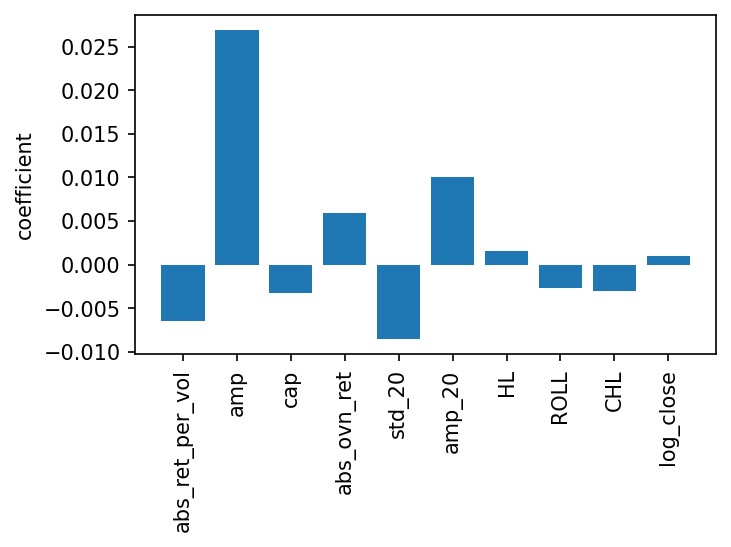

In [73]:
fea_names = [ 'abs_ret_per_vol', 'amp', 'cap', 'abs_ovn_ret', 'std_20', 'amp_20', 'HL', 'ROLL', 'CHL', 'log_close']  # 特征名字
plt.figure(figsize=(5,3),dpi=150)
plt.bar(fea_names, Linear_spread_cs.weight.detach().cpu().numpy()[0]*spread_std)
plt.xticks(rotation=90)
plt.ylabel('coefficient')

plt.show()

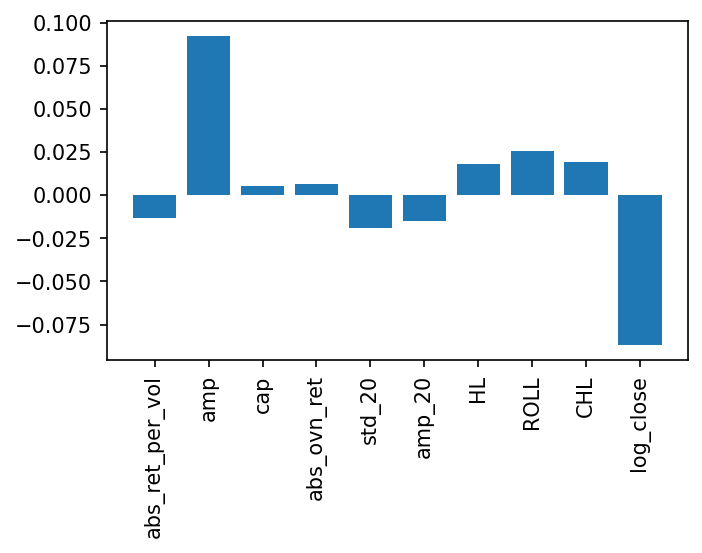

In [74]:
plt.figure(figsize=(5,3),dpi=150)
plt.bar(fea_names, Linear_rela_cs.weight.detach().cpu().numpy()[0]*rela_std*100)
plt.xticks(rotation=90)
plt.show()

In [9]:
Linear_spread_cs.weight.detach().cpu().numpy()[0]

array([-0.13875654,  0.02161704, -0.00329324,  0.01702883, -0.00924768,
        0.00143344,  0.00058518, -0.00314383, -0.00058875,  0.00120247],
      dtype=float32)

### lgbm特征重要性

In [13]:
with open(r'D:\Documents\学习资料\本科毕业论文/model/lgbm_rela_cs.pkl', 'rb') as f:
    lgbm_rela = pickle.load(f)
with open(r'D:\Documents\学习资料\本科毕业论文/model/lgbm_spread_cs.pkl', 'rb') as f:
    lgbm_spread = pickle.load(f)    

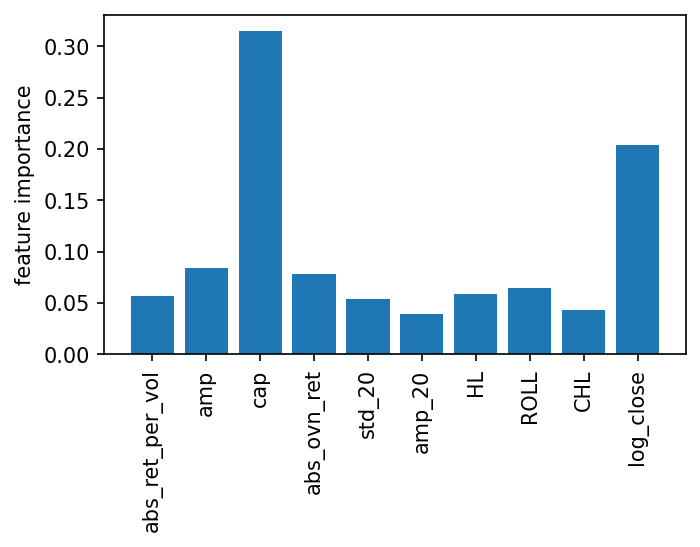

In [18]:
fea_names = [ 'abs_ret_per_vol', 'amp', 'cap', 'abs_ovn_ret', 'std_20', 'amp_20', 'HL', 'ROLL', 'CHL', 'log_close']
plt.figure(figsize=(5,3),dpi=150)
plt.bar(fea_names, lgbm_spread.feature_importance()/np.sum(lgbm_spread.feature_importance()))
plt.xticks(rotation=90)
plt.ylabel('feature importance')
plt.show()


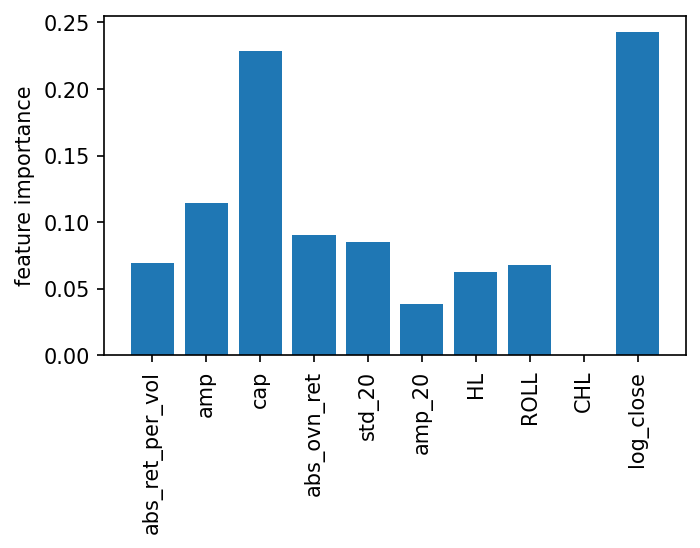

In [5]:
plt.figure(figsize=(5,3),dpi=150)
plt.bar(fea_names, lgbm_rela.feature_importance()/np.sum(lgbm_rela.feature_importance()))
plt.xticks(rotation=90)
plt.ylabel('feature importance')
plt.show()

### XGBoost特征重要性

In [11]:
with open(r'D:\Documents\学习资料\本科毕业论文/model/xgb_rela.pkl', 'rb') as f:
    xgb_rela = pickle.load(f)
with open(r'D:\Documents\学习资料\本科毕业论文/model/xgb_spread.pkl', 'rb') as f:
    xgb_spread = pickle.load(f)    

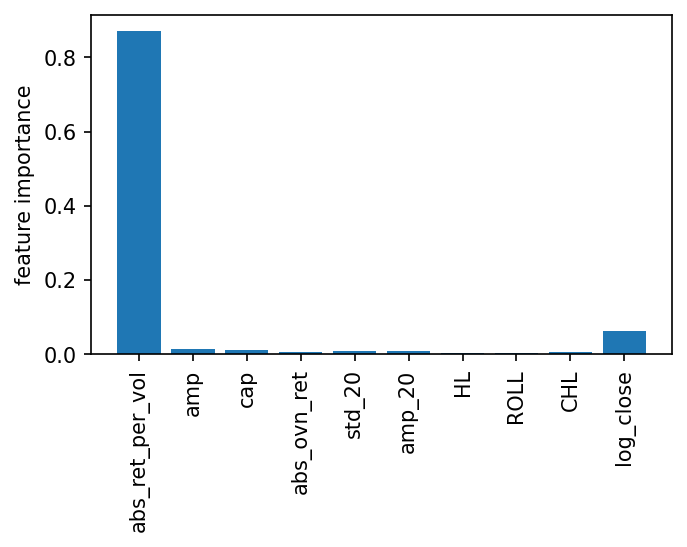

In [12]:
fea_names = [ 'abs_ret_per_vol', 'amp', 'cap', 'abs_ovn_ret', 'std_20', 'amp_20', 'HL', 'ROLL', 'CHL', 'log_close']
plt.figure(figsize=(5,3),dpi=150)
plt.bar(fea_names, xgb_spread.feature_importances_)
plt.xticks(rotation=90)
plt.ylabel('feature importance')
plt.show()


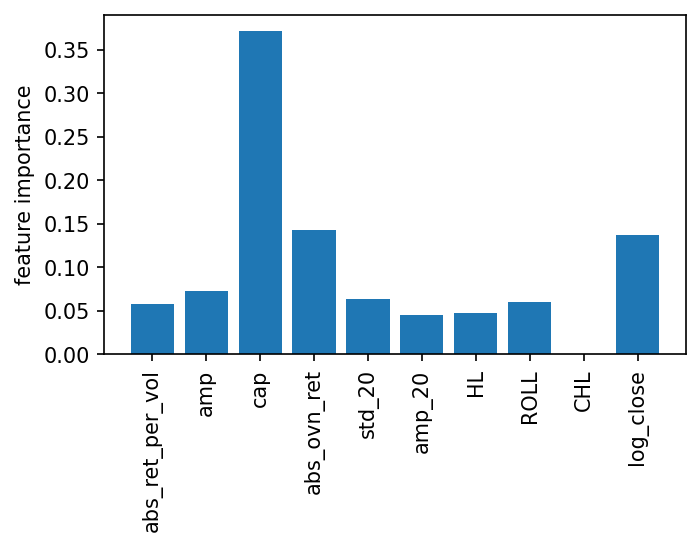

In [9]:
fea_names = [ 'abs_ret_per_vol', 'amp', 'cap', 'abs_ovn_ret', 'std_20', 'amp_20', 'HL', 'ROLL', 'CHL', 'log_close']
plt.figure(figsize=(5,3),dpi=150)
plt.bar(fea_names, xgb_rela.feature_importances_)
plt.xticks(rotation=90)
plt.ylabel('feature importance')
plt.show()


### 神经网络的部分依赖图

In [38]:
GateNet_rela_cs = torch.load(r'D:\Documents\学习资料\本科毕业论文\model/GateNet_rela_cs.pt')
GateNet_spread_cs = torch.load(r'D:\Documents\学习资料\本科毕业论文\model/GateNet_spread_cs.pt')

#### spread的部份依赖图

In [39]:
se = SpreadEstimator()
univ = ~np.isnan(se.data.data_dic['close'])  # 合法的univ
with open(r'D:\Documents\学习资料\本科毕业论文/data/signal_spread.pkl', 'rb') as f:
    signal = pickle.load(f)
with open(r'D:\Documents\学习资料\本科毕业论文/data/target_spread.pkl', 'rb') as f:
    target = pickle.load(f)
with open(r'D:\Documents\学习资料\本科毕业论文/data//close_top.pkl', 'rb') as f:
    close_top = pickle.load(f)
x, y = get_train_data_cs(signal, target, univ & close_top)
xx = []
for x_ in x:
    for i in range(x_.shape[1]):
        x_[:, i] -= torch.mean(x_[:, i])
        x_[:, i] /= torch.std(x_[:, i])
    xx.append(x_)
x = xx
x = torch.cat(x, dim=0)
y = torch.cat(y, dim=0)

x_m = []
y_m = []
for i in tqdm(range(10)):
    lb = np.max([torch.min(x[:, i]).item(),-3])
    ub = np.min([torch.max(x[:, i]).item(),3])
    x_rp = np.arange(lb,ub,(ub-lb)/20)
    y_rp = []
    for xx in x_rp:
        x_new = torch.clone(x)
        x_new[:,i] = xx
        y_rp.append(torch.mean(GateNet_spread_cs(x_new)).item())
    x_m.append(x_rp)
    y_m.append(y_rp)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 11.19it/s]


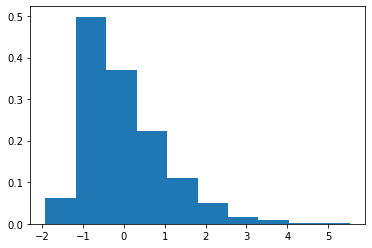

In [42]:
plt.hist(x[:,i].cpu().numpy(),density=True)
plt.show()

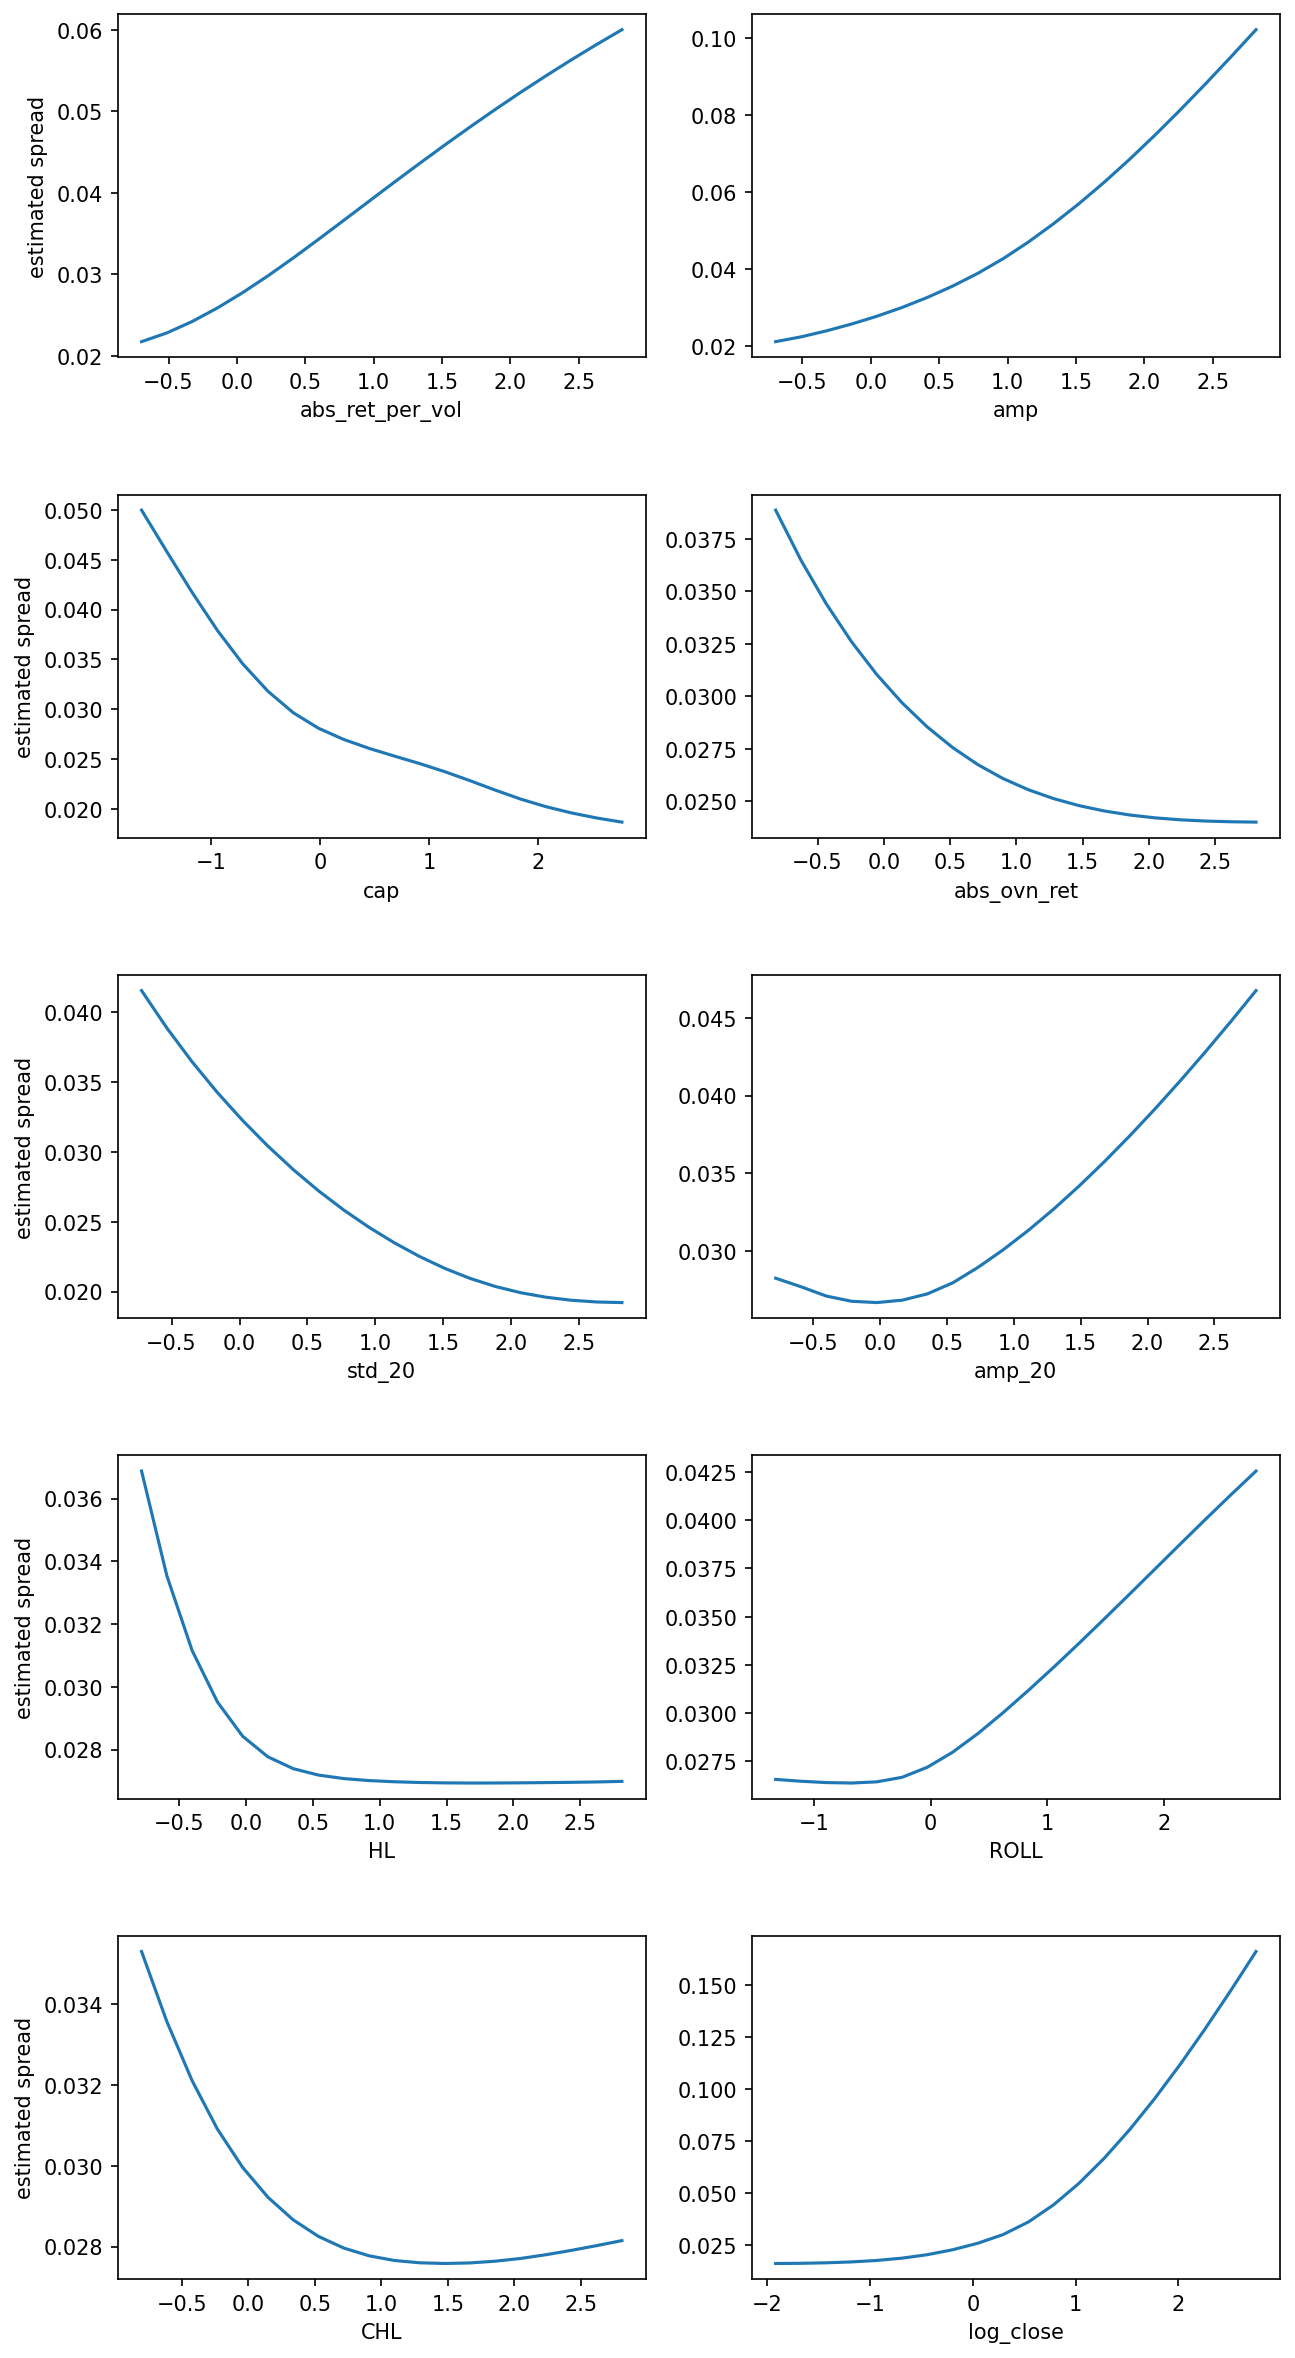

In [43]:
fea_names = [ 'abs_ret_per_vol', 'amp', 'cap', 'abs_ovn_ret', 'std_20',
             'amp_20', 'HL', 'ROLL', 'CHL', 'log_close']

plt.figure(figsize=(10,20), dpi=150)
plt.subplots_adjust(hspace=0.4)
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.plot(x_m[i], y_m[i])
#     plt.hist(x[:,i].cpu().numpy(),density=True)
    plt.xlabel(fea_names[i])
    if i%2 == 0:
        plt.ylabel('estimated spread')
plt.show()

#### rela_spread部份依赖图

In [26]:
se = SpreadEstimator()
univ = ~np.isnan(se.data.data_dic['close'])  # 合法的univ
with open(r'D:\Documents\学习资料\本科毕业论文/data/signal_rela.pkl', 'rb') as f:
    signal = pickle.load(f)
with open(r'D:\Documents\学习资料\本科毕业论文/data/target_rela.pkl', 'rb') as f:
    target = pickle.load(f)
with open(r'D:\Documents\学习资料\本科毕业论文/data//close_top.pkl', 'rb') as f:
    close_top = pickle.load(f)
x, y = get_train_data_cs(signal, target, univ & close_top)
xx = []
for x_ in x:
    for i in range(x_.shape[1]):
        x_[:, i] -= torch.mean(x_[:, i])
        x_[:, i] /= torch.std(x_[:, i])
    xx.append(x_)
x = xx
x = torch.cat(x, dim=0)
y = torch.cat(y, dim=0)

x_m = []
y_m = []
for i in tqdm(range(10)):
    lb = np.max([torch.min(x[:, i]).item(),-3])
    ub = np.min([torch.max(x[:, i]).item(),3])
    x_rp = np.arange(lb,ub,(ub-lb)/20)
    y_rp = []
    for xx in x_rp:
        x_new = torch.clone(x)
        x_new[:,i] = xx
        y_rp.append(torch.mean(GateNet_rela_cs(x_new)).item()*100)
    x_m.append(x_rp)
    y_m.append(y_rp)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 31.75it/s]


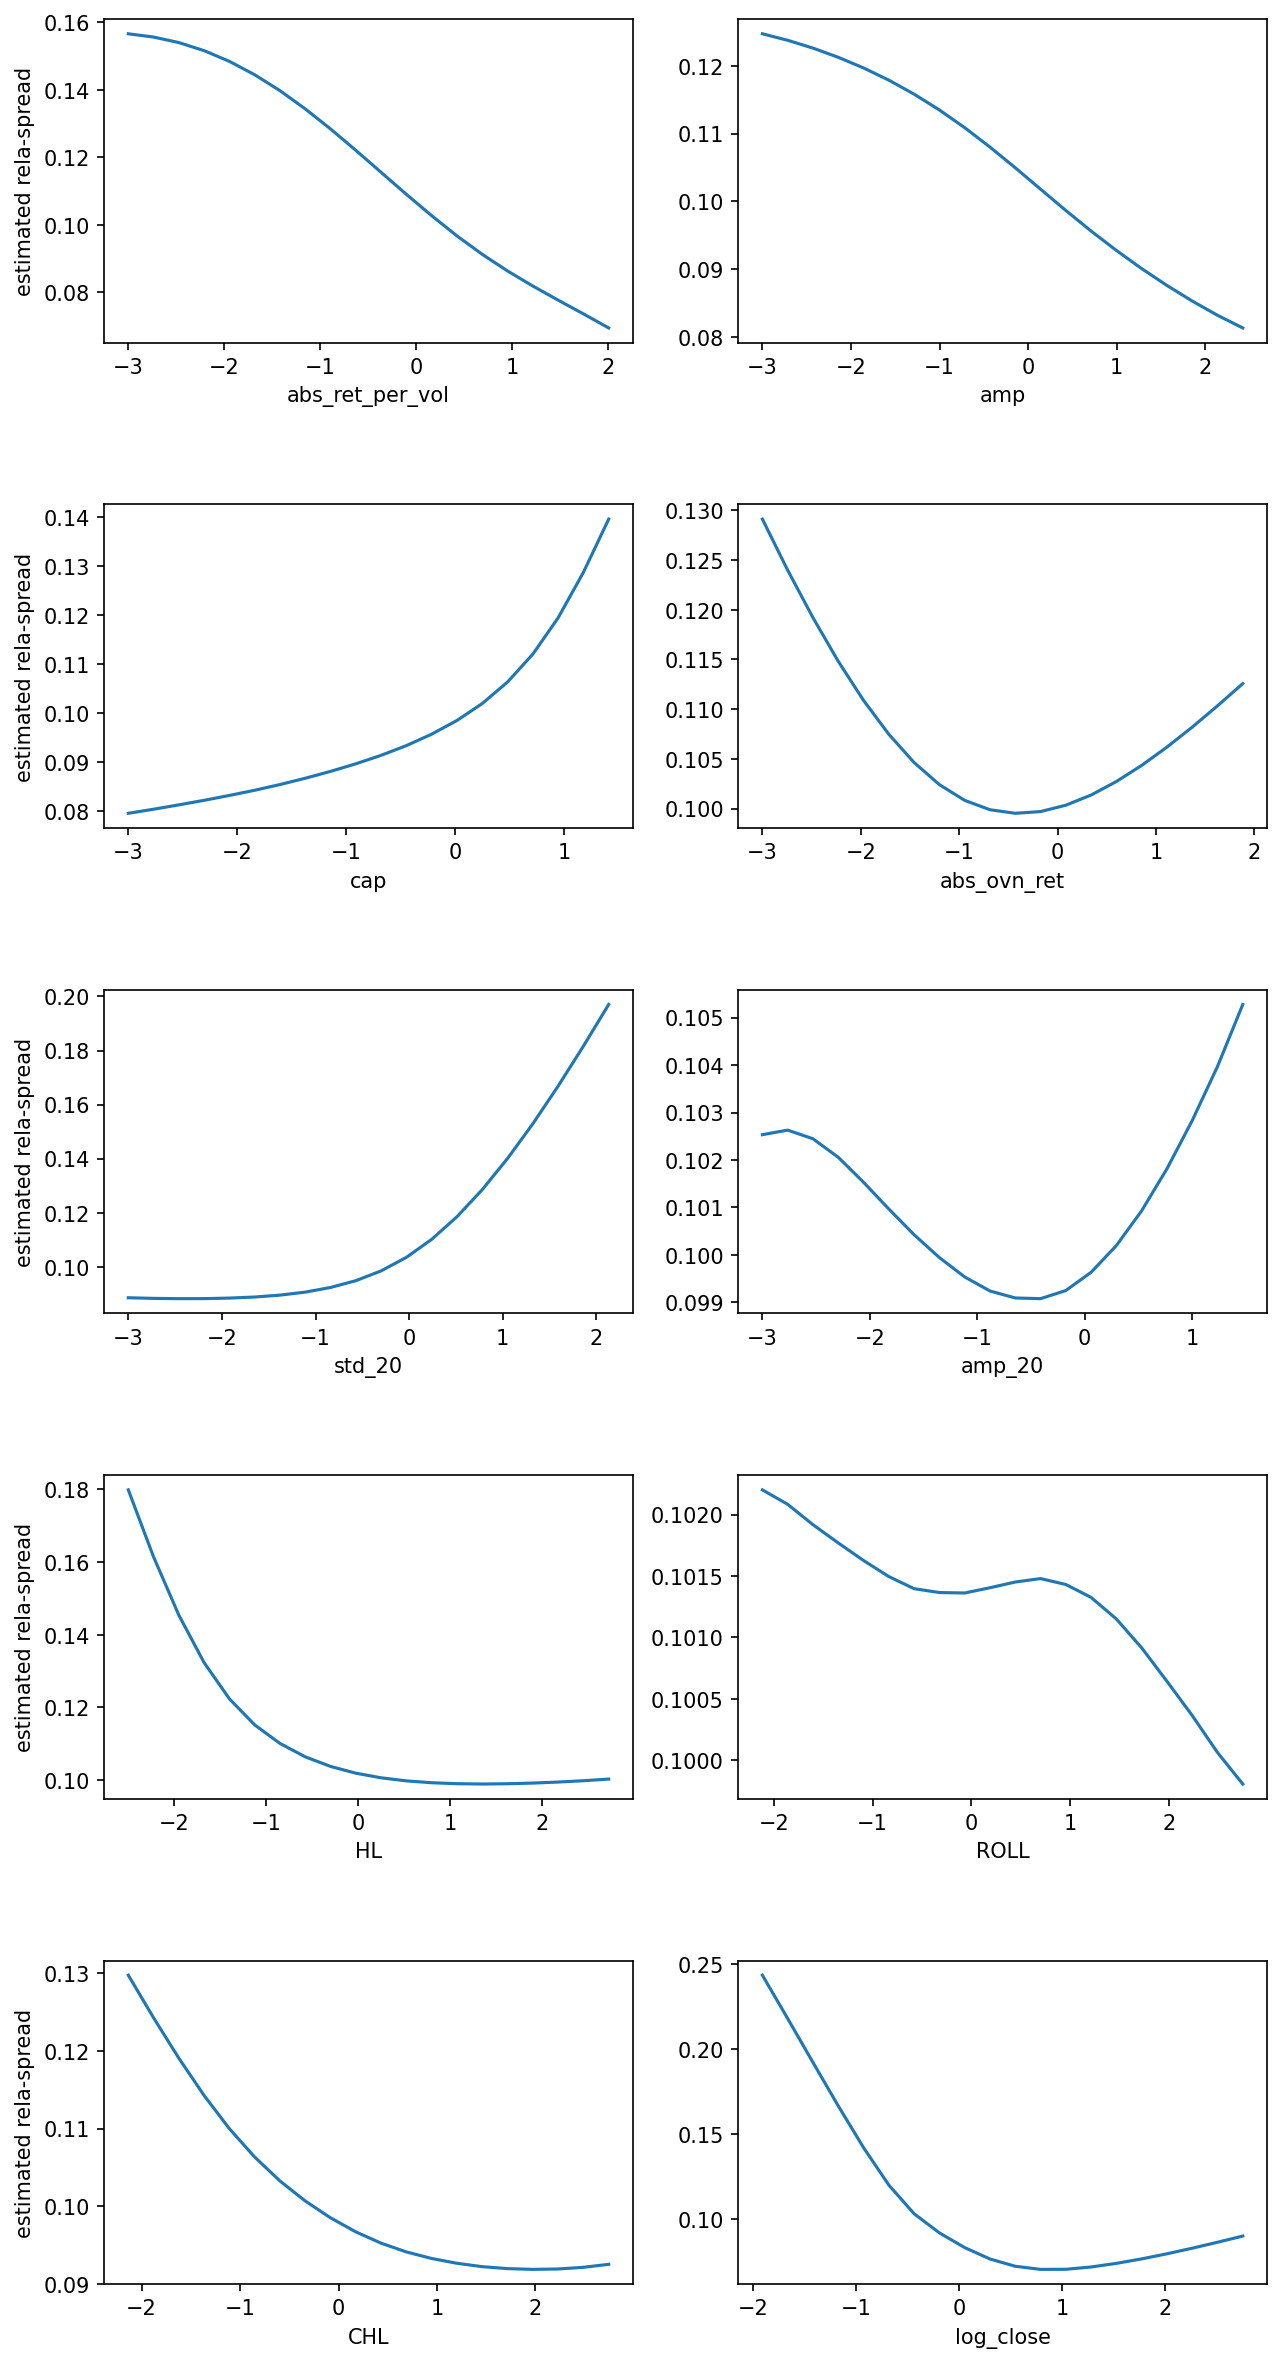

In [28]:
plt.figure(figsize=(10,20), dpi=150)
plt.subplots_adjust(hspace=0.5)
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.plot(x_m[i], y_m[i])
    plt.xlabel(fea_names[i])
    if i%2 == 0:
        plt.ylabel('estimated rela-spread')
plt.show()

### 树模型的部分依赖图

#### spread

In [19]:
se = SpreadEstimator()
univ = ~np.isnan(se.data.data_dic['close'])  # 合法的univ
with open(r'D:\Documents\学习资料\本科毕业论文/data/signal_spread.pkl', 'rb') as f:
    signal = pickle.load(f)
with open(r'D:\Documents\学习资料\本科毕业论文/data/target_spread.pkl', 'rb') as f:
    target = pickle.load(f)
x, y = get_train_data_cs(signal, target, univ)
xx = []
for x_ in x:
    for i in range(x_.shape[1]):
        x_[:, i] -= torch.mean(x_[:, i])
        x_[:, i] /= torch.std(x_[:, i])
    xx.append(x_)
x = xx
x = torch.cat(x, dim=0)
y = torch.cat(y, dim=0)

x_m = []
y_m = []
for i in tqdm(range(10)):
    lb = np.max([torch.min(x[:, i]).item(),-3])
    ub = np.min([torch.max(x[:, i]).item(),3])
    x_rp = np.arange(lb,ub,(ub-lb)/20)
    y_rp = []
    for xx in x_rp:
        x_new = torch.clone(x)
        x_new[:,i] = xx
        y_rp.append(np.mean(lgbm_spread.predict(x_new.cpu().detach().numpy())))
    x_m.append(x_rp)
    y_m.append(y_rp)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:23<00:00,  2.38s/it]


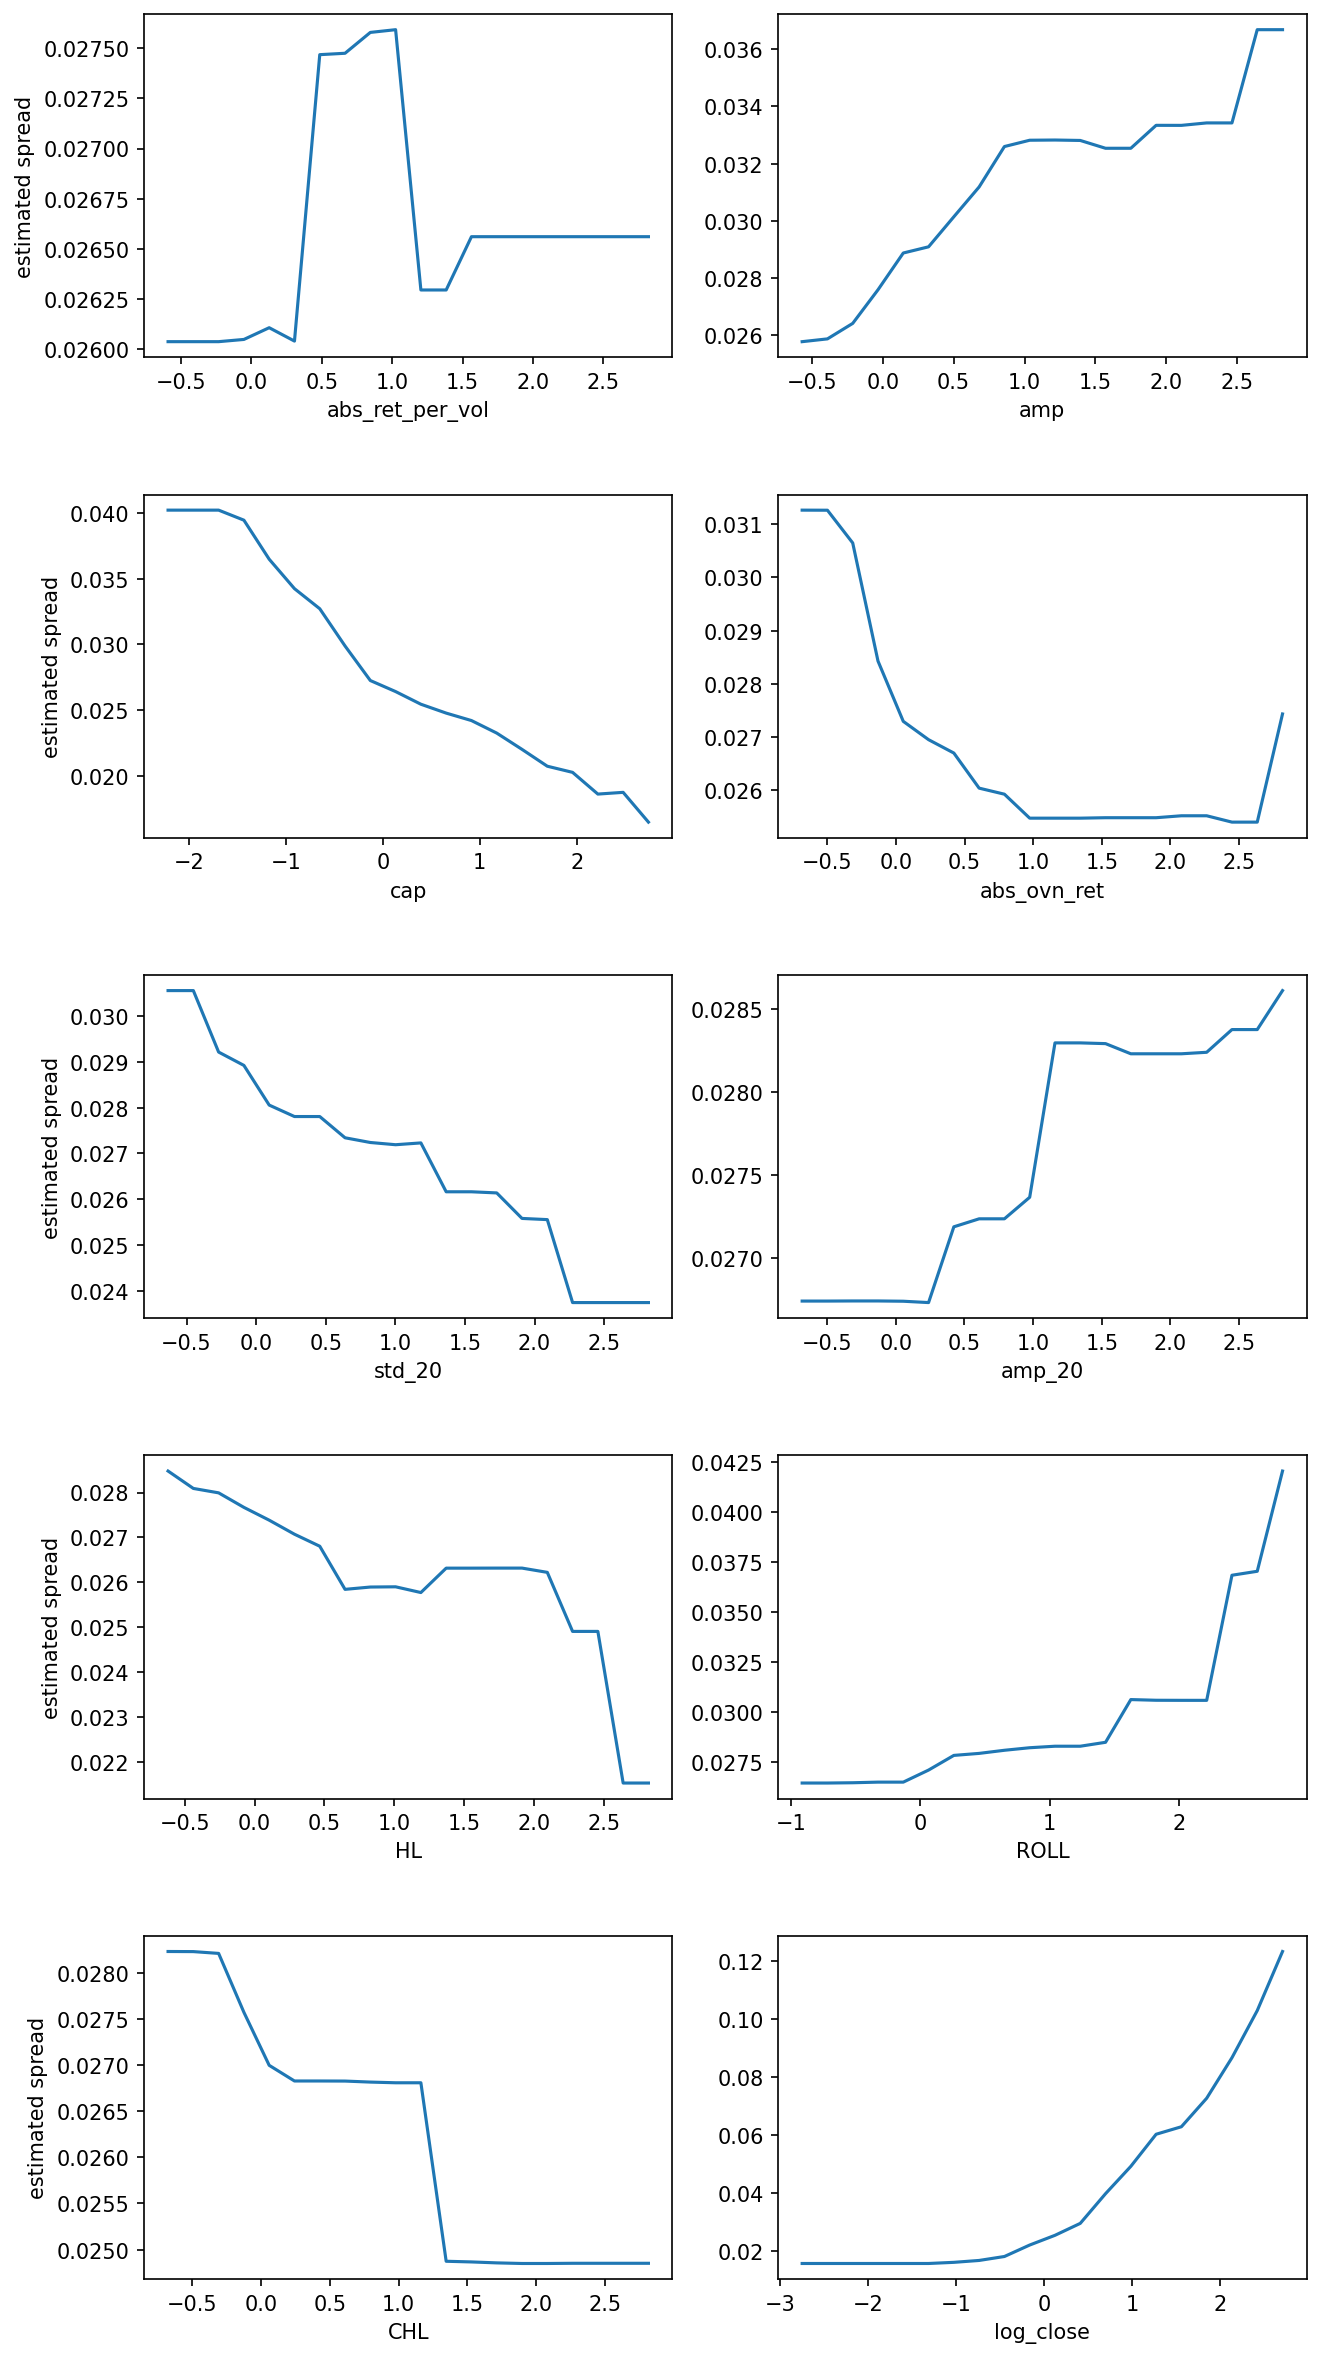

In [20]:
plt.figure(figsize=(10,20), dpi=150)
plt.subplots_adjust(hspace=0.4)
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.plot(x_m[i], y_m[i])
    plt.xlabel(fea_names[i])
    if i%2 == 0:
        plt.ylabel('estimated spread')
plt.show()

#### rela

In [21]:
se = SpreadEstimator()
univ = ~np.isnan(se.data.data_dic['close'])  # 合法的univ
with open(r'D:\Documents\学习资料\本科毕业论文/data/signal_rela.pkl', 'rb') as f:
    signal = pickle.load(f)
with open(r'D:\Documents\学习资料\本科毕业论文/data/target_rela.pkl', 'rb') as f:
    target = pickle.load(f)
x, y = get_train_data_cs(signal, target, univ)
xx = []
for x_ in x:
    for i in range(x_.shape[1]):
        x_[:, i] -= torch.mean(x_[:, i])
        x_[:, i] /= torch.std(x_[:, i])
    xx.append(x_)
x = xx
x = torch.cat(x, dim=0)
y = torch.cat(y, dim=0)

x_m = []
y_m = []
for i in tqdm(range(10)):
    lb = np.max([torch.min(x[:, i]).item(),-3])
    ub = np.min([torch.max(x[:, i]).item(),3])
    x_rp = np.arange(lb,ub,(ub-lb)/20)
    y_rp = []
    for xx in x_rp:
        x_new = torch.clone(x)
        x_new[:,i] = xx
        y_rp.append(np.mean(lgbm_rela.predict(x_new.cpu().detach().numpy()))*100)
    x_m.append(x_rp)
    y_m.append(y_rp)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:27<00:00,  2.78s/it]


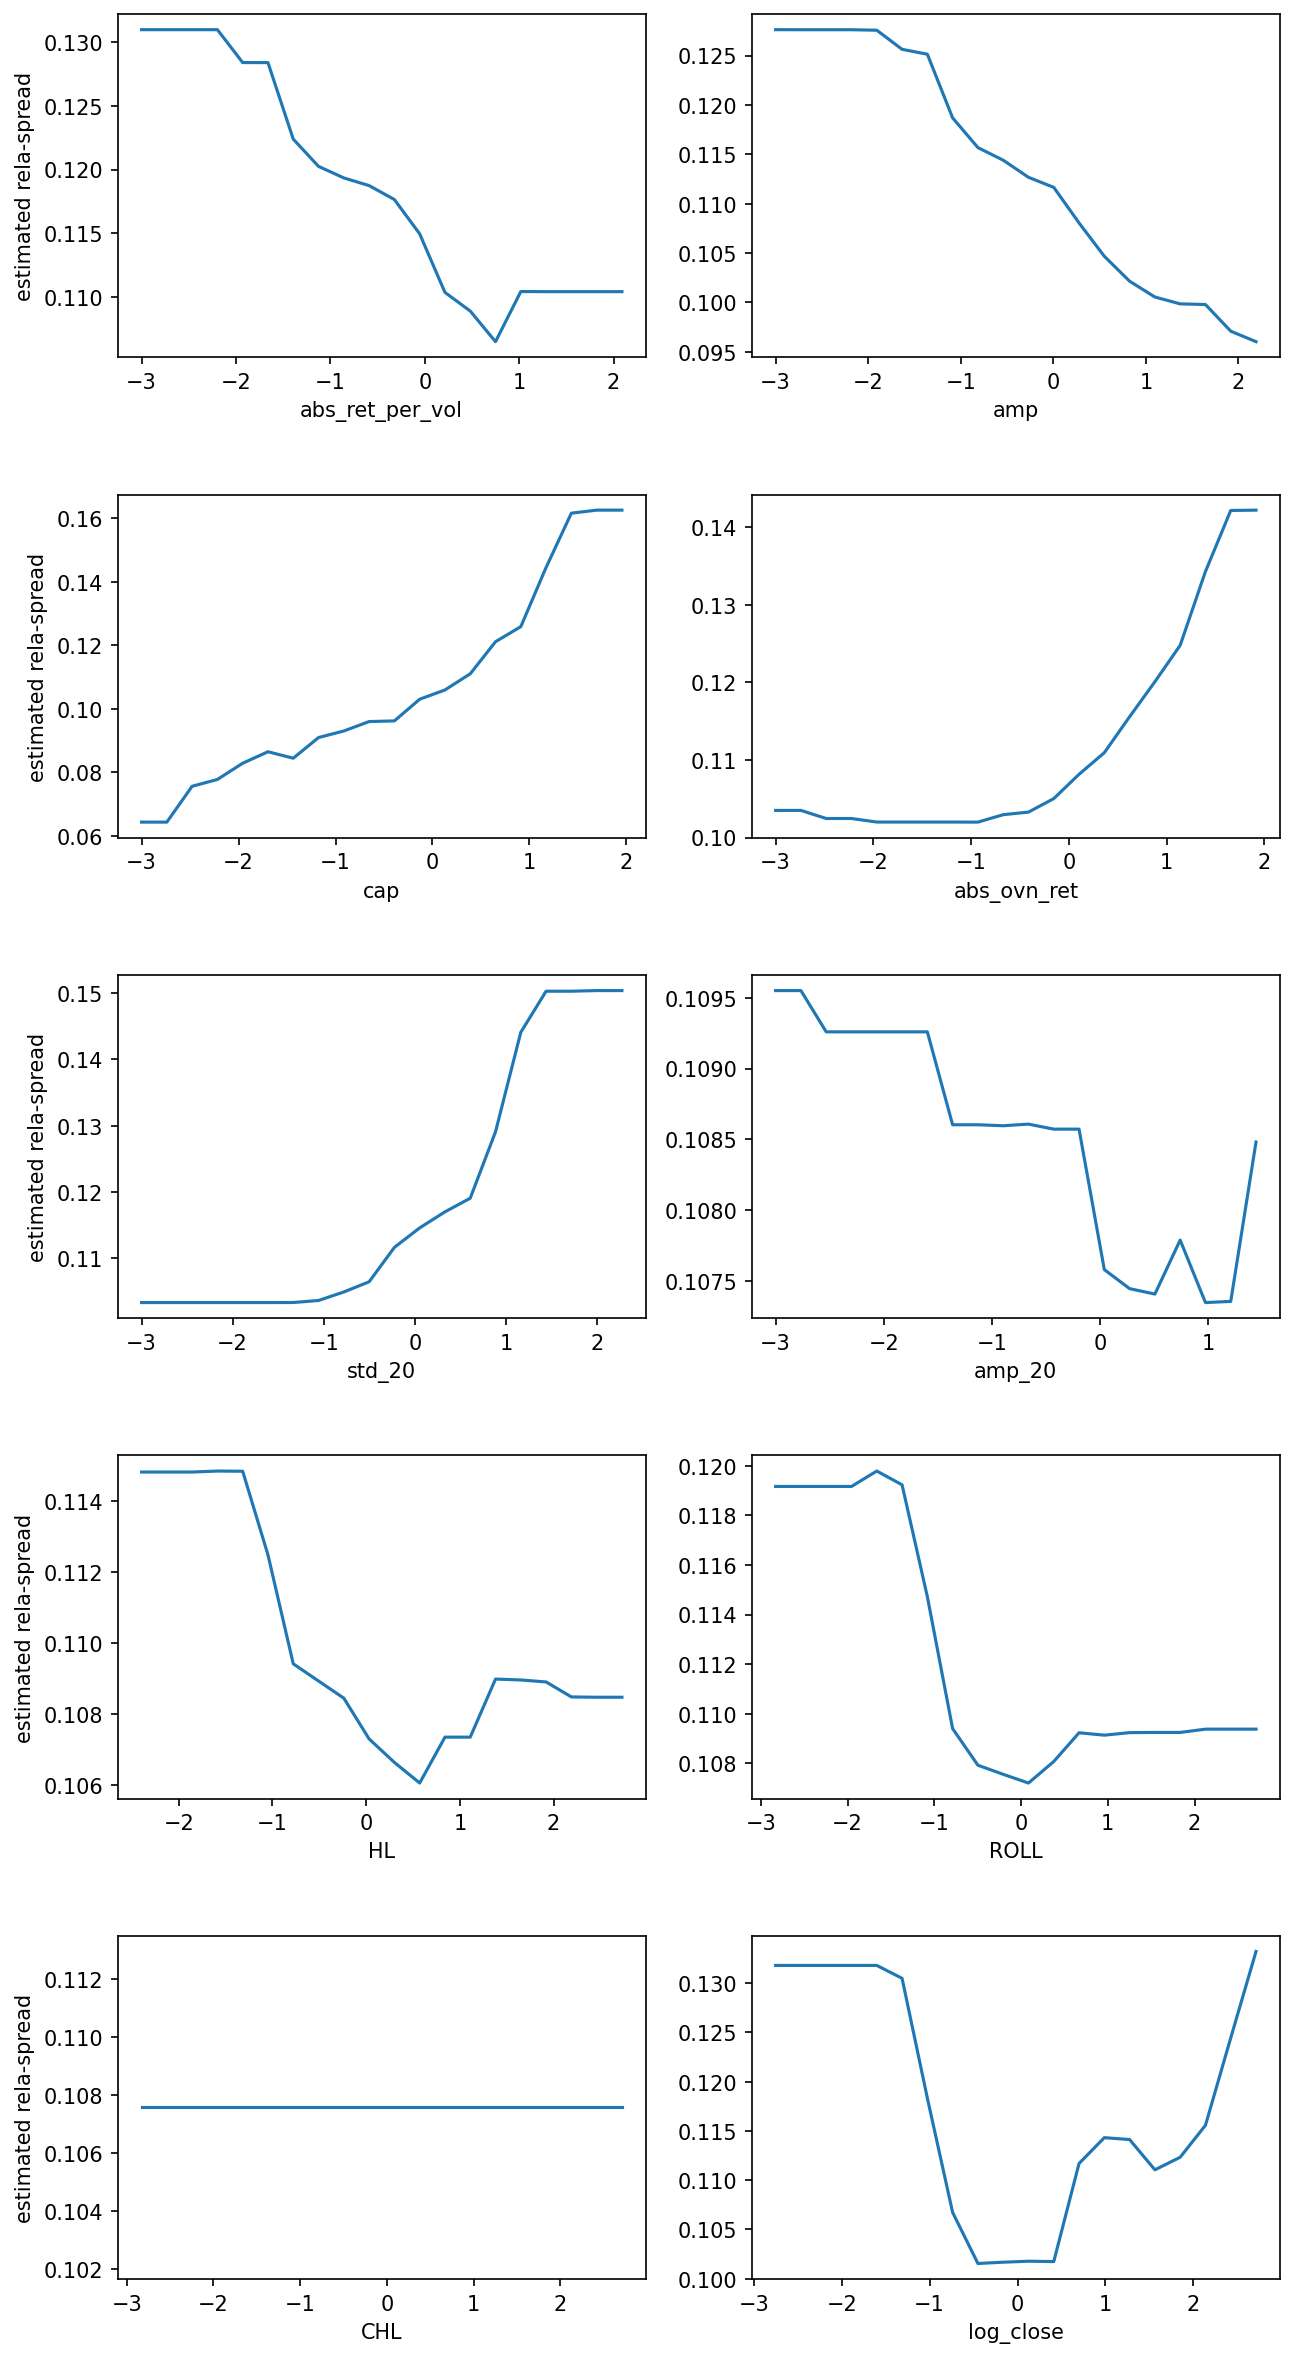

In [22]:
plt.figure(figsize=(10,20), dpi=150)
plt.subplots_adjust(hspace=0.4)
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.plot(x_m[i], y_m[i])
    plt.xlabel(fea_names[i])
    if i%2 == 0:
        plt.ylabel('estimated rela-spread')
plt.show()

TypeError: cannot unpack non-iterable AxesSubplot object

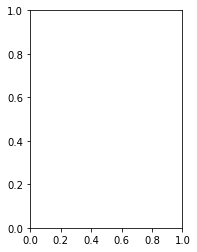

In [31]:
t = np.arange(0.05, 10.0, 0.01)
s1 = np.exp(t)
s2 = np.cos(t)

fig, ax = plt.subplots()

ax.plot(t, s1, c='b',ls='--',label='$\exp(x)$')
ax.tick_params('y', colors='b')
ax.legend()

ax2 = ax.twinx()
ax2.plot(t, s2, c='g', ls=":",label='$\cos(x)$')

ax2.tick_params('y', colors='r')
ax2.legend()

plt.show()